# Titanic Dataset: Exploratory Data Analysis

This is part 1 of my project on the famous Titanic dataset from Kaggle. In this part, we are going to do an exploratory data analysis to answer the following questions:                                                                                                                                                                                                                                 
1. Who were the passengers on the Titanic? We will look at class, age, gender etc.
2. How many people have travelled alone? How big on average were the families?
3. What was the most popular port of embarkation?
5. And, most importantly, what were the factors that affected the chances of survival?

Let's start, shall we?

## Import Libraries

Firstly, we import the libraries needed for data analysis. We import pandas and numpy libraries to manipulate the dataset, and matplotlib and seaborn for data visualisations.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

The Titanic datasets are downloaded from Kaggle. Since there are two datasets, we are going to use a train dataset since it has a dependent variable (if a person survived or not) needed for an exploratory data analysis. 

In [2]:
dataset = pd.read_csv('datasets/titanic_train.csv')

## Quick Overview of the Dataset

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that for this dataset we have the following columns:

PassengerId - a unique identifier for each passenger

Survived - binary value that shows if a person survived(1), or not (0)

Pclass -  the cabin class of the passenger (1 is the highest, 3 is the lowest)

Name, Sex, Age - self explanatory

SibSp - number of siblings and spouses travelling with the passenger (weird combination, I know!)

Parch - number of parents and children travelling with the passenger

Ticket - ticket number

Fare -  the price of the ticket

Cabin - cabin number of the passenger

Embarked - the port of embarkation (S - Southampton, C - Cherbourg, Q - Queenstown)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Info() function gives us a great way to look at the dataset and to see how complete is the dataset. We can see that the majority of the columns have all entries. However, Cabin column has majority of it's entries missing. Moreover, around a fifth of entries for age column are missing. 

In [5]:
dataset.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


describe() function is useful to get a sense of the numerical columns and how the data is distributed. In particular, it shows us that the oldest person on the Titanic (or in this dataset to be precise) is 80 years old whereas the lowest age is 0.42 (which is around 5 months old). The most expensive fare is 512.33 whereas the average fare was 32.20 pounds. Do you think the person who paid such an expensive fare survived?

In [6]:
dataset.loc[dataset['Fare'] == 512.3292, 'Survived']

258    1
679    1
737    1
Name: Survived, dtype: int64

In fact, three passengers who paid the largest fare survived. And they say money is not a solution!

## A Closer Look at the Passengers of the Titanic

Now let's try to answer the first question. What do we know about the passengers of the Titanic?

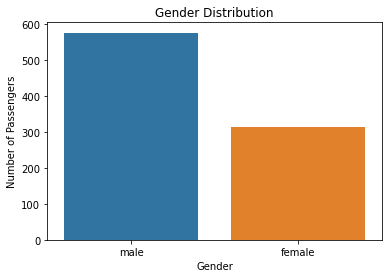

In [14]:
sns.countplot(x='Sex', data=dataset)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

We can see that there are more male passengers than female. Let's look if this distribution is same for all three classes.

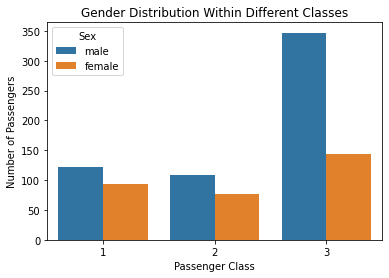

In [17]:
sns.countplot(x='Pclass', data=dataset, hue='Sex')
plt.title('Gender Distribution Within Different Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

We can see that within first and second class the distribution is more even than in the third class. It was common for men of lower status to try to find job opportunities in the United States, so maybe this explains such drastic difference. 

According to the UK's National Archives, women and children were given the priority. So we can also look at the distribution of children on the Titanic (assume child is a person less than 16 years of age)

In [18]:
def separate_kids(passenger):
    sex = passenger['Sex']
    age = passenger['Age']
    return 'child' if age < 16 else sex

dataset['Person'] = dataset.apply(separate_kids, axis=1) 

Above we created a function that separates children from men and women based on their age and created a new column in the dataset called 'Person'. Now let's look at their distribution within different classes.

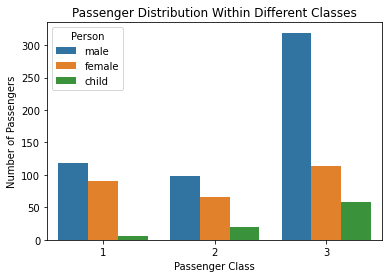

In [19]:
sns.countplot(x='Pclass', data=dataset, hue='Person')
plt.title('Passenger Distribution Within Different Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

Adding children did not really add any new information. Since there is more people in third class than in second and first, there are more children in third class. 

Now lets look at age distribution of male and female passengers as well as age distribution within passenger classes.

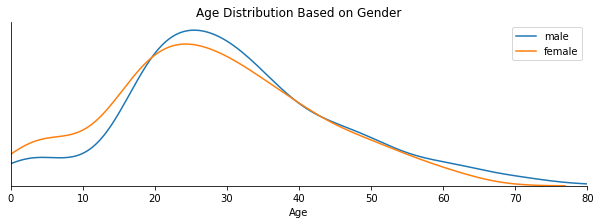

In [33]:
sns.FacetGrid(data=dataset, hue='Sex', aspect=3).map(sns.kdeplot, 'Age').set(xlim=(0, dataset['Age'].max()))
plt.legend()
plt.title("Age Distribution Based on Gender")
plt.yticks([])
plt.ylabel('')
plt.show()

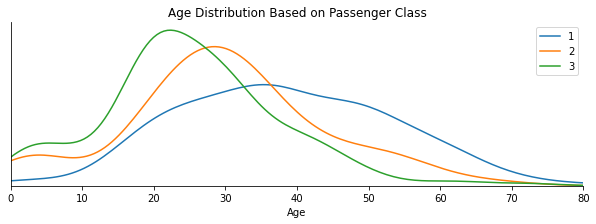

In [34]:
sns.FacetGrid(data=dataset, hue='Pclass', aspect=3).map(sns.kdeplot, 'Age').set(xlim=(0, dataset['Age'].max()))
plt.legend()
plt.title("Age Distribution Based on Passenger Class")
plt.yticks([])
plt.ylabel('')
plt.show()

Earlier we have discussed that the reason behind third class having more male passenger than female may be that men of lower social status used to travel to the USA searching for the job opportunities. The second graph gives us even more evidence that this may be the case. We can see while first class has nearly normal distribution, the third class has highly right skewed distribution with the median age of around 22 years old. Since it is younger people who left home countries in search for work, this maybe the reason. 

## Family is All that Matters

We have hypothesized that young males in third class moved to the USA searching for work. This would mean they must have travelled alone. At the same time, people of first or second class may have travelled for tourism or to relocate as the family. So we would assume there are more people who travelled alone in third class, and more families travelled in first and second class. Let's see what the data says. 

In [35]:
dataset['FamilySize'] = 1 + dataset['SibSp'] + dataset['Parch']

In [44]:
conditions = [(dataset['FamilySize'] > 1), (dataset['FamilySize'] == 1)]
values = ['No', 'Yes']
dataset['Alone'] = np.select(conditions, values)

We created two more columns. FamilySize adds values from SibSp and Parch columns and adds one (since the passenger is the part of the family). The second column just looks at FamilySize and outputs if passenger is alone or not.

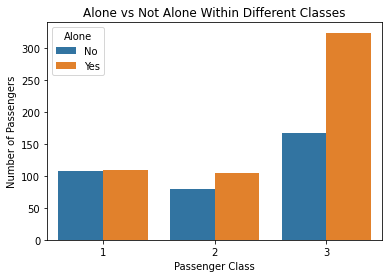

In [45]:
sns.countplot(x='Pclass', data=dataset, hue='Alone')
plt.title('Alone vs Not Alone Within Different Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

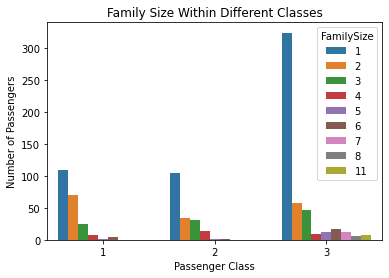

In [46]:
sns.countplot(x='Pclass', data=dataset, hue='FamilySize')
plt.title('Family Size Within Different Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

Overall, we see that for first and second class the number of people who travelled with family is nearly equal to the number of passengers travelling alone. Around 2/3 of passengers in the third class travelled alone. But did that make a difference in terms of survivability? The answer is at the end of this notebook!

## All Aboard!!!

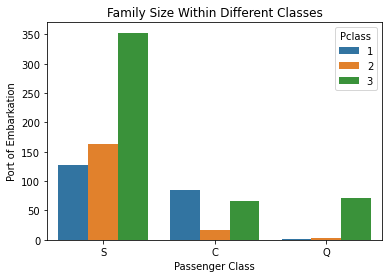

In [49]:
sns.countplot(x='Embarked', data=dataset, hue='Pclass')
plt.title('Family Size Within Different Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Port of Embarkation')
plt.show()

We can see that the majority of the passengers embarked Titanic in Southampton, which was the first point of embarkation. Two other conclusions we can draw:
1. Cherbourg, which was the second point of embarkation, had more first class passengers than passengers from third class. This suggests that a lot of rich French people embarked there. 
2. Nearly all passengers that boarded Titanic in Queenstown (now Cobh, Northern Ireland) were from third class. This can actually further prove our point that a lot of people in third class went to the USA for job seeking since Irish people were a large part of immigrants at that point in time (according to Wikipedia, 3.3 to 3.7 million Irish immigrated to the USA between 1951 and 1920).

## Surviving the Titanic

Now we can finally test which factors might have increased (or decreased) chances of surviving. Let's start with gender!

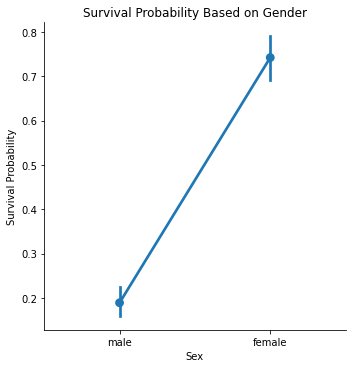

In [54]:
sns.factorplot('Sex','Survived',data=dataset)
plt.title('Survival Probability Based on Gender')
plt.ylabel('Survival Probability')
plt.show()

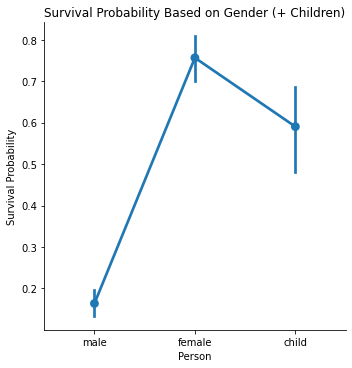

In [55]:
sns.factorplot('Person','Survived',data=dataset)
plt.title('Survival Probability Based on Gender (+ Children)')
plt.ylabel('Survival Probability')
plt.show()

Clearly it sucked to be a male on board of the Titanic! However, if we are being serious, the graph above makes sense. It is a well-known fact that women and children were given the priority when boarding a lifeboat. 

Possible reasons why children's survival rate is lower than women's:
1. Some children may have been asleep and did not have enough time to evacuate
2. We have defined children as passengers less than 16 years old. Since women were given a priority, some male children who looked old enough may not have been allowed on a lifeboat. 

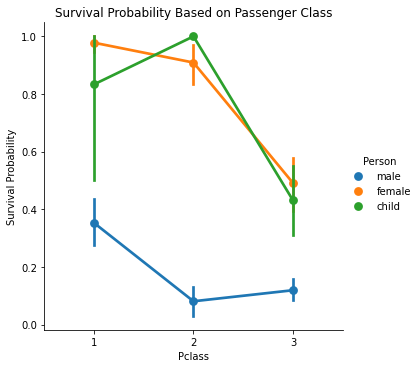

In [57]:
sns.factorplot('Pclass','Survived',hue='Person',data=dataset)
plt.title('Survival Probability Based on Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

Obviously enough, not only gender or age played the role, but also the class. We can see that women and children from third class had a chance of 50% of surviving whereas first and second class had more than 80% chance of getting in a lifeboat.

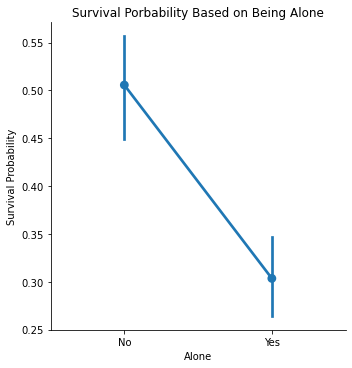

In [63]:
sns.factorplot('Alone','Survived',data=dataset)
plt.title('Survival Porbability Based on Being Alone')
plt.ylabel('Survival Probability')
plt.show()

It seems like knowing someone on the ship increased the chances of surviving by 20 percent. That's why I prefer travelling with my family. You never know, right?

This is the end of my exploratory project on the famous Titanic dataset. In the next part we are going to build a machine learning model that will predict if a passenger from test dataset survived or not. Since the survivability of women was around 70%, we would want our model to perform better than that (otherwise it is just easier to always say that a female passenger survived and a male died to get 70% accuracy). See you then!